# Visualization of Illinois Census from 2010-2019


#### Dataset Source: 
https://www.census.gov/data/datasets/time-series/demo/popest/2010s-total-cities-and-towns.html#tables under "Incorportated Places" >> "Illinois"

## Initialization

In [1]:
#import libraries
import pandas as pd
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
import numpy as np
pd.options.mode.chained_assignment = None
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns

In [2]:
#read csv
df = pd.read_csv('SUB-IP-EST2019-ANNRES-17.csv')

In [3]:
df

,Geographic Area,Census(04/01/10),Estimates Base(04/01/10),2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,"Abingdon city, Illinois",3319,3286,3285,3273,3242,3226,3212,3171,3141,3117,3073,3051
1,"Addieville village, Illinois",252,252,252,248,253,249,247,245,245,240,241,238
2,"Addison village, Illinois",36942,37084,37134,37319,37409,37493,37432,37339,37104,36946,36696,36482
3,"Adeline village, Illinois",85,85,85,84,84,83,82,82,81,81,80,80
4,"Albany village, Illinois",891,903,905,901,891,891,887,888,883,874,871,863
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1293,"Yale village, Illinois",86,86,86,86,86,85,85,85,85,84,85,85
1294,"Yates City village, Illinois",693,691,691,687,683,679,678,670,667,661,655,652
1295,"Yorkville city, Illinois",16921,16950,17053,17311,17555,17837,18181,18474,18860,19398,20092,20613
1296,"Zeigler city, Illinois",1801,1801,1803,1798,1789,1772,1766,1761,1745,1740,1722,1712


In [4]:
#check column types
df.dtypes

Geographic Area             object
Census(04/01/10)             int64
Estimates Base(04/01/10)     int64
2010                         int64
2011                         int64
2012                         int64
2013                         int64
2014                         int64
2015                         int64
2016                         int64
2017                         int64
2018                         int64
2019                         int64
dtype: object

In [5]:
#create a new column and categorize areas into city as 1 and non_city as 0
df['City'] = df['2019'].copy()
for i in range(len(df)):
    if ('city' in df.loc[i, 'Geographic Area']):
        df['City'][i] = 1;
    else:
        df['City'][i] = 0;
    
df.sample(3)

,Geographic Area,Census(04/01/10),Estimates Base(04/01/10),2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,City
1114,"Stanford village, Illinois",596,619,619,618,620,623,615,608,610,609,605,598,0
910,"Park Forest village, Illinois",21975,21981,21997,22074,22109,22128,22084,21954,21796,21604,21387,21210,0
41,"Ashkum village, Illinois",761,764,763,766,757,746,742,737,725,713,705,693,0


In [6]:
#count number of cities and non-cities
df['City'].value_counts()

0    998
1    300
Name: City, dtype: int64

In [7]:
#create a new column and calculate net change from April 1st of 2010 to July 1st of 2019
df['Net Change'] = df['City'].copy()
for i in range(len(df)):
    df.loc[i,'Net Change'] = df.loc[i,'2019'] - df.loc[i,'Estimates Base(04/01/10)']
    
df.sample(3)

,Geographic Area,Census(04/01/10),Estimates Base(04/01/10),2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,City,Net Change
372,"Erie village, Illinois",1602,1603,1602,1594,1582,1569,1554,1552,1541,1523,1508,1499,0,-104
47,"Astoria town, Illinois",1141,1141,1141,1136,1125,1111,1101,1090,1081,1067,1055,1036,0,-105
581,"Joppa village, Illinois",360,338,337,335,331,323,325,320,317,316,309,303,0,-35


In [8]:
#create a new column and calculate net change precent from April 1st of 2010 to July 1st of 2019
df['Net Change %'] = df['Net Change'].copy()
for i in range(len(df)):
    df.loc[i,'Net Change %'] = (df.loc[i,'Net Change']/df.loc[i,'Estimates Base(04/01/10)'] * 100).round(2)
    
df.sample(3)

,Geographic Area,Census(04/01/10),Estimates Base(04/01/10),2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,City,Net Change,Net Change %
742,"Melvin village, Illinois",452,452,452,445,445,437,432,431,424,422,419,410,0,-42,-9.29
134,"Brookfield village, Illinois",18978,18974,18982,19031,19068,19082,19050,18964,18829,18656,18462,18310,0,-664,-3.50
102,"Biggsville village, Illinois",304,315,316,307,300,296,298,297,290,287,282,278,0,-37,-11.75


In [9]:
#split df into two dataframes: city and non_city
city = df[df['City'] == 1]
non_city = df[df['City'] == 0]

In [10]:
city.sample(3)

,Geographic Area,Census(04/01/10),Estimates Base(04/01/10),2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,City,Net Change,Net Change %
726,"Martinsville city, Illinois",1167,1166,1163,1156,1159,1146,1141,1127,1125,1119,1101,1088,1,-78,-6.69
271,"Crystal Lake city, Illinois",40743,40752,40766,40618,40469,40375,40439,40332,40118,40069,39993,39829,1,-923,-2.26
441,"Girard city, Illinois",2103,2103,2104,2104,2076,2061,2043,2030,2023,2020,2014,2000,1,-103,-4.90


In [11]:
non_city.sample(3)

,Geographic Area,Census(04/01/10),Estimates Base(04/01/10),2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,City,Net Change,Net Change %
1153,"Thayer village, Illinois",693,693,694,696,695,691,689,683,678,670,664,655,0,-38,-5.48
657,"Lincolnshire village, Illinois",7275,7308,7314,7311,7298,7313,7317,7310,7301,7349,7935,7893,0,585,8.00
867,"Odell village, Illinois",1046,1039,1036,1035,1024,1011,1000,988,981,981,966,964,0,-75,-7.22


## Analysis

In [12]:
#top 3 most populous cities in 2019
city.nlargest(3, '2019')

,Geographic Area,Census(04/01/10),Estimates Base(04/01/10),2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,City,Net Change,Net Change %
219,"Chicago city, Illinois",2695598,2695652,2697477,2708114,2719141,2725731,2727066,2724344,2716723,2711069,2701423,2693976,1,-1676,-0.06
54,"Aurora city, Illinois",197899,197975,198207,199150,199648,199803,200189,200315,200799,200391,199199,197757,1,-218,-0.11
804,"Naperville city, Illinois",141853,142170,142402,143205,144017,144892,146193,146975,147192,147619,148090,148449,1,6279,4.42


In [13]:
#top 3 most populous non-cities in 2019
non_city.nlargest(3,'2019')

,Geographic Area,Census(04/01/10),Estimates Base(04/01/10),2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,City,Net Change,Net Change %
225,"Cicero town, Illinois",83891,84241,84267,84438,84569,84601,84397,83884,83219,82399,81477,80796,0,-3445,-4.09
36,"Arlington Heights village, Illinois",75101,75185,75252,75528,75918,76116,76145,75987,75795,75473,75116,74760,0,-425,-0.57
114,"Bolingbrook village, Illinois",73366,73365,73475,73789,73949,73909,74032,74142,74383,75003,75043,74545,0,1180,1.61


In [14]:
#top 3 least populous cities in 2019
city.nsmallest(3,'2019')

,Geographic Area,Census(04/01/10),Estimates Base(04/01/10),2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,City,Net Change,Net Change %
808,"Nason city, Illinois",236,236,235,235,237,236,235,234,235,234,233,233,1,-3,-1.27
888,"Orient city, Illinois",358,358,358,358,357,354,354,351,349,348,345,343,1,-15,-4.19
43,"Ashley city, Illinois",536,536,535,528,527,517,515,510,506,495,495,490,1,-46,-8.58


In [15]:
#top 3 least populous non-cities in 2019
non_city.nsmallest(3,'2019')

,Geographic Area,Census(04/01/10),Estimates Base(04/01/10),2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,City,Net Change,Net Change %
594,"Kaskaskia village, Illinois",14,14,14,14,14,13,13,13,13,13,13,13,0,-1,-7.14
1189,"Valley City village, Illinois",13,13,13,13,13,13,13,13,12,12,13,13,0,0,0.00
1163,"Time village, Illinois",23,23,23,23,23,22,22,22,22,22,22,22,0,-1,-4.35


In [52]:
#count statewide population net change from April 1st of 2010 to July 1st of 2019
df['Net Change'].sum()

-101718

In [48]:
#count city population net change from April 1st of 2010 to July 1st of 2019
city['Net Change'].sum()

-90182

In [17]:
#count non-city population net change from April 1st of 2010 to July 1st of 2019
non_city['Net Change'].sum()

-11536

In [18]:
#top 3 cities with most net gain
city.nlargest(3,'Net Change')

,Geographic Area,Census(04/01/10),Estimates Base(04/01/10),2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,City,Net Change,Net Change %
206,"Champaign city, Illinois",81055,81246,81405,82330,83202,84112,84953,86218,87244,87839,87994,88909,1,7663,9.43
804,"Naperville city, Illinois",141853,142170,142402,143205,144017,144892,146193,146975,147192,147619,148090,148449,1,6279,4.42
1295,"Yorkville city, Illinois",16921,16950,17053,17311,17555,17837,18181,18474,18860,19398,20092,20613,1,3663,21.61


In [19]:
#top 3 cities with most net loss
city.nsmallest(3,'Net Change')

,Geographic Area,Census(04/01/10),Estimates Base(04/01/10),2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,City,Net Change,Net Change %
1002,"Rockford city, Illinois",152871,153285,153147,152129,151258,150608,149378,148465,147796,147008,146307,145609,1,-7676,-5.01
291,"Decatur city, Illinois",76122,76131,76105,75922,75449,74955,74155,73265,72510,71790,71136,70746,1,-5385,-7.07
921,"Peoria city, Illinois",115007,115150,114980,115426,115798,116646,115955,115183,114227,112618,111449,110417,1,-4733,-4.11


In [20]:
#top 3 non-cities with most net gain
non_city.nlargest(3,'Net Change')

,Geographic Area,Census(04/01/10),Estimates Base(04/01/10),2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,City,Net Change,Net Change %
892,"Oswego village, Illinois",30355,30452,30659,31232,31806,32339,33238,33956,34463,34837,35183,36252,0,5800,19.05
934,"Pingree Grove village, Illinois",4532,4518,4587,4713,4910,5471,5885,6648,7408,8097,8936,9874,0,5356,118.55
938,"Plainfield village, Illinois",39581,39884,39994,40208,40515,41800,42137,42518,42941,43832,44084,44308,0,4424,11.09


In [21]:
#top 3 non-cities with most net loss
non_city.nsmallest(3,'Net Change')

,Geographic Area,Census(04/01/10),Estimates Base(04/01/10),2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,City,Net Change,Net Change %
225,"Cicero town, Illinois",83891,84241,84267,84438,84569,84601,84397,83884,83219,82399,81477,80796,0,-3445,-4.09
1086,"Skokie village, Illinois",64784,64845,64889,65087,65247,65328,65223,64888,64437,63847,63171,62700,0,-2145,-3.31
861,"Oak Lawn village, Illinois",56690,56690,56732,56924,57078,57170,57106,56825,56456,55983,55430,55022,0,-1668,-2.94


In [22]:
#top 3 cities with most net gain by percent
city.nlargest(3,'Net Change %')

,Geographic Area,Census(04/01/10),Estimates Base(04/01/10),2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,City,Net Change,Net Change %
1295,"Yorkville city, Illinois",16921,16950,17053,17311,17555,17837,18181,18474,18860,19398,20092,20613,1,3663,21.61
777,"Morris city, Illinois",13636,13639,13666,13697,13777,13880,14059,14265,14400,14656,14912,15053,1,1414,10.37
206,"Champaign city, Illinois",81055,81246,81405,82330,83202,84112,84953,86218,87244,87839,87994,88909,1,7663,9.43


In [23]:
#top 3 cities with most net loss by percent
city.nsmallest(3,'Net Change %')

,Geographic Area,Census(04/01/10),Estimates Base(04/01/10),2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,City,Net Change,Net Change %
165,"Cairo city, Illinois",2831,2831,2819,2742,2657,2619,2564,2446,2335,2270,2184,2082,1,-749,-26.46
136,"Brookport city, Illinois",984,980,976,970,954,938,881,870,868,859,840,826,1,-154,-15.71
783,"Mounds city, Illinois",810,810,805,784,781,771,757,737,727,715,700,684,1,-126,-15.56


In [24]:
#top 3 non-cities with most net gain by percent
non_city.nlargest(3,'Net Change %')

,Geographic Area,Census(04/01/10),Estimates Base(04/01/10),2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,City,Net Change,Net Change %
934,"Pingree Grove village, Illinois",4532,4518,4587,4713,4910,5471,5885,6648,7408,8097,8936,9874,0,5356,118.55
1210,"Volo village, Illinois",2929,2916,2988,3224,3528,3902,4263,4766,5206,5465,5578,5813,0,2897,99.35
295,"Deer Park village, Illinois",3200,3130,3133,3140,3140,3148,3157,3664,3656,3645,4250,4225,0,1095,34.98


In [25]:
#top 3 non-cities with most net loss by percent
non_city.nsmallest(3,'Net Change %')

,Geographic Area,Census(04/01/10),Estimates Base(04/01/10),2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,City,Net Change,Net Change %
1146,"Tamms village, Illinois",632,1045,1043,1025,972,588,575,549,526,512,494,472,0,-573,-54.83
1154,"Thebes village, Illinois",436,437,435,424,411,403,395,377,360,350,337,321,0,-116,-26.54
330,"East Cape Girardeau village, Illinois",385,387,385,375,364,359,352,336,321,312,300,286,0,-101,-26.10


In [51]:
#calculate statewide population net change percent from April 1st of 2010 to July 1st of 2019
(df['Net Change'].sum()/df['Estimates Base(04/01/10)'].sum()*100).round(3)

-0.913

In [46]:
#calculate city population net change percent from April 1st of 2010 to July 1st of 2019
(city['Net Change'].sum()/city['Estimates Base(04/01/10)'].sum()*100).round(3)

-1.316

In [47]:
#calculate non-city population net change percent from April 1st of 2010 to July 1st of 2019
(non_city['Net Change'].sum()/non_city['Estimates Base(04/01/10)'].sum()*100).round(3)

-0.269

## Graph

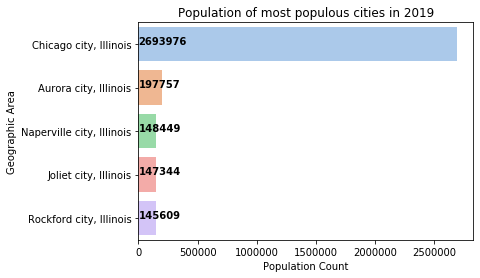

In [26]:
#barplot of 5 most populous cities in 2019
year_city = city.nlargest(5,'2019')['2019']
place_city = city.nlargest(5,'2019')['Geographic Area']
sns.barplot(x=year_city, y=place_city, data=city.nlargest(5,'2019'),palette='pastel')
plt.title('Population of most populous cities in 2019')
plt.xlabel('Population Count')
#display population counts
for i,j in enumerate(city.nlargest(5,'2019')['2019']):
    plt.text(0.5,i, j, weight='bold', color='black')
plt.show()

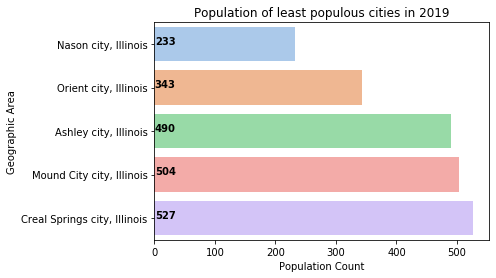

In [27]:
#barplot of 5 least populous cities in 2019
year_city2 = city.nsmallest(5,'2019')['2019']
place_city2 = city.nsmallest(5,'2019')['Geographic Area']
sns.barplot(x=year_city2, y=place_city2, data=city.nsmallest(5,'2019'),palette='pastel')
plt.title('Population of least populous cities in 2019')
plt.xlabel('Population Count')
for i,j in enumerate(city.nsmallest(5,'2019')['2019']):
    plt.text(0.5,i, j, weight='bold', color='black')
plt.show()

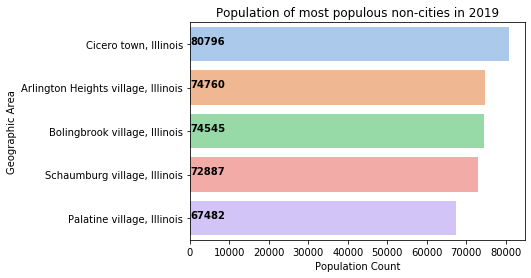

In [28]:
#barplot of 5 most populous non-cities in 2019
year_non_city = non_city.nlargest(5,'2019')['2019']
place_non_city = non_city.nlargest(5,'2019')['Geographic Area']
sns.barplot(x=year_non_city, y=place_non_city, data=non_city.nlargest(5,'2019'),palette='pastel')
plt.title('Population of most populous non-cities in 2019')
plt.xlabel('Population Count')
for i,j in enumerate(non_city.nlargest(5,'2019')['2019']):
    plt.text(0.5,i, j, weight='bold', color='black')
plt.show()

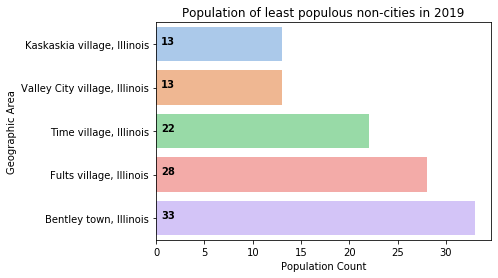

In [29]:
#barplot of 5 least populous non-cities in 2019
year_non_city2 = non_city.nsmallest(5,'2019')['2019']
place_non_city2 = non_city.nsmallest(5,'2019')['Geographic Area']
sns.barplot(x=year_non_city2, y=place_non_city2, data=non_city.nsmallest(5,'2019'),palette='pastel')
plt.title('Population of least populous non-cities in 2019')
plt.xlabel('Population Count')
for i,j in enumerate(non_city.nsmallest(5,'2019')['2019']):
    plt.text(0.5,i, j, weight='bold', color='black')
plt.show()

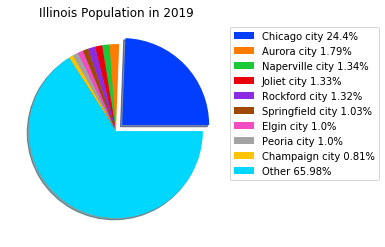

In [30]:
#pie chart of Illinois population in 2019
areas = df['Geographic Area'].unique()
year_19 = df['2019']
year_19_series = df.groupby('Geographic Area')['2019'].sum().sort_values(ascending=False)
label = []
pop = []
count = 9
total = 0
percent = 0

for area in year_19_series.index:
    if count > 0:
        #add percentage share of city to pop list
        percent += np.round(year_19_series[area]/year_19_series.sum()*100,2)
        #manipulate text label and add it to label list
        percent_label = str(np.round(year_19_series[area]/year_19_series.sum()*100,2))+'%'
        label.append(area.split(', ')[0] + ' ' + percent_label)
        pop.append(year_19_series[area])
        count -=1
    else:
        total += year_19_series[area]

label.append('Other' + ' ' + str(np.round(100-percent,2)) + '%')
pop.append(total)
plt.title('Illinois Population in 2019')
plt.pie(pop,explode=(0.1,0,0,0,0,0,0,0,0,0),pctdistance=0.6,colors=sns.color_palette('bright'),shadow=True)
plt.legend(labels=label,bbox_to_anchor=(1,1))
plt.show()

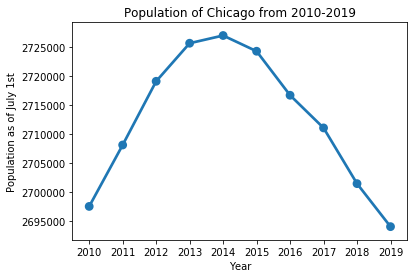

In [31]:
#line chart of population change of Chicago from 2010 to 2019
df_top5_19_tmp = df.sort_values(by='2019', ascending=False).head(5)[['Geographic Area','2010','2011','2012','2013','2014','2015','2016','2017','2018','2019']]
df_top5_19 = df_top5_19_tmp.transpose().reset_index().drop(0).infer_objects()
df_top5_19.columns = ['Year','Chicago','Aurora','Naperville','Joliet','Rockford']
sns.pointplot(x='Year',y='Chicago',data=df_top5_19)
plt.title('Population of Chicago from 2010-2019')
plt.ylabel('Population as of July 1st')
plt.show()

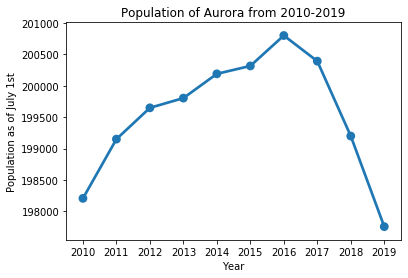

In [32]:
#line chart of population change of Aurora from 2010 to 2019
sns.pointplot(x='Year',y='Aurora',data=df_top5_19)
plt.title('Population of Aurora from 2010-2019')
plt.ylabel('Population as of July 1st')
plt.show()

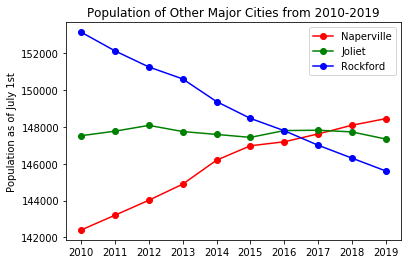

In [33]:
#line chart of population change of 3 other major cities from 2010 to 2019
plt.plot_date(x='Year',y='Naperville',data=df_top5_19,color='red',linestyle='-')
plt.plot_date(x='Year',y='Joliet',data=df_top5_19,color='green',linestyle='-')
plt.plot_date(x='Year',y='Rockford',data=df_top5_19,color='blue',linestyle='-')
plt.legend()
plt.title('Population of Other Major Cities from 2010-2019')
plt.ylabel('Population as of July 1st')
plt.show()

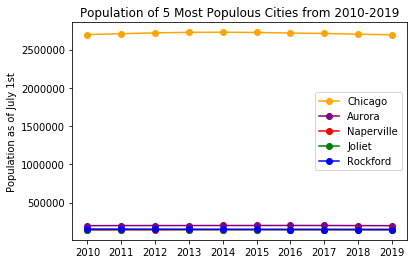

In [34]:
#line chart of population change of 5 most populous cities from 2010 to 2019
plt.plot_date(x='Year',y='Chicago',data=df_top5_19,color='orange',linestyle='-')
plt.plot_date(x='Year',y='Aurora',data=df_top5_19,color='purple',linestyle='-')
plt.plot_date(x='Year',y='Naperville',data=df_top5_19,color='red',linestyle='-')
plt.plot_date(x='Year',y='Joliet',data=df_top5_19,color='green',linestyle='-')
plt.plot_date(x='Year',y='Rockford',data=df_top5_19,color='blue',linestyle='-')
plt.legend()
plt.title('Population of 5 Most Populous Cities from 2010-2019')
plt.ylabel('Population as of July 1st')
plt.show()

In [35]:
#add latitude and longitude columns
df_top10_19 = df.nlargest(10,'2019')[['Geographic Area','2019']].reset_index()
df_top10_19['Geographic Area'] = df_top10_19['Geographic Area']
df_top10_19['Latitude'] = [41.8781,41.7606,41.7508,41.5250,42.2711,
                           39.7817,42.0354,40.6936,40.1164,42.3636]
df_top10_19['Longitude'] = [-87.6298,-88.3201,-88.1535,-88.0817,-89.0940,
                            -89.6501,-88.2826,-89.5890,-88.2434,-87.8448]
df_top10_19.head(3)

,index,Geographic Area,2019,Latitude,Longitude
0,219,"Chicago city, Illinois",2693976,41.8781,-87.6298
1,54,"Aurora city, Illinois",197757,41.7606,-88.3201
2,804,"Naperville city, Illinois",148449,41.7508,-88.1535


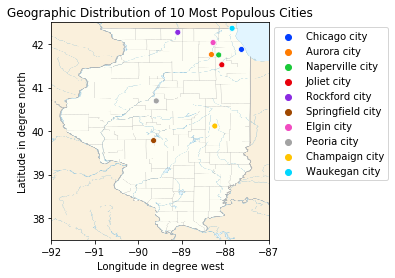

In [36]:
#scatter plot of population distribution on Illinois map
illinois_map = mpimg.imread('Illinois.png')
label_map = []
for i in range(10):
    label_map.append(df_top10_19['Geographic Area'][i].split(', ')[0])
    
sns.scatterplot(x='Longitude',y='Latitude',data=df_top10_19,hue=label_map,palette='bright')
plt.imshow(illinois_map, extent=[-92,-87,37.5,42.5],alpha=0.5)
plt.xlabel('Longitude in degree west')
plt.ylabel('Latitude in degree north')
plt.legend(bbox_to_anchor=(1,1))
plt.title('Geographic Distribution of 10 Most Populous Cities')
plt.show()

## Summary

The dataset contains 1298 geographically unique entries with annual population records from April 1, 2010 to July 1, 2019. Out of the 1298 areas, 998 are non-cities and 300 are cities, meaning 77% of areas in Illinois are non-cities and 23% are cities.